In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 1、用tensorflow进行线性回归

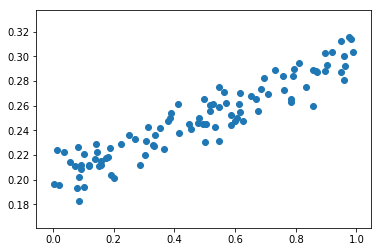

In [2]:
x_data = np.random.rand(100)    # np.random.rand(): 生成一个0-1间的均匀数组，100: 生成一百个
noise = np.random.normal(loc=0.0, scale=0.01, size=x_data.shape)
y_data = x_data*0.1 + 0.2 + noise
plt.scatter(x_data, y_data)
plt.show()

Iter 0,weight is [0.7336915],bias is [-0.01206031]
Iter 20,weight is [0.35235925],bias is [0.07019695]
Iter 40,weight is [0.20891466],bias is [0.14436495]
Iter 60,weight is [0.1473919],bias is [0.17617528]
Iter 80,weight is [0.12100506],bias is [0.1898186]
Iter 100,weight is [0.10968786],bias is [0.19567015]
Iter 120,weight is [0.10483396],bias is [0.19817986]
Iter 140,weight is [0.10275214],bias is [0.19925626]
Iter 160,weight is [0.10185926],bias is [0.19971793]
Iter 180,weight is [0.10147631],bias is [0.19991593]
Iter 200,weight is [0.10131206],bias is [0.20000086]


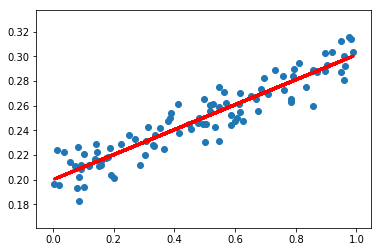

In [3]:
# 用tensorflow构建线性模型
w = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))
y = x_data*w + b    # y的预测值
loss = tf.losses.mean_squared_error(y_data, y)
# 定义一个优化器，优化参数：截距和斜率
optimizer = tf.train.GradientDescentOptimizer(0.3)    # 学习率
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(201):
        sess.run(train)
        if i%20==0:
            print('Iter {},weight is {},bias is {}'.format(i, sess.run(w), sess.run(b)))
    y_pred = sess.run(y)
    plt.scatter(x_data, y_data)
    plt.plot(x_data, y_pred, 'r-', lw=3)
    plt.show()

### 2、用tensorflow进行非线性回归

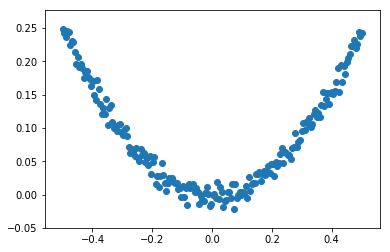

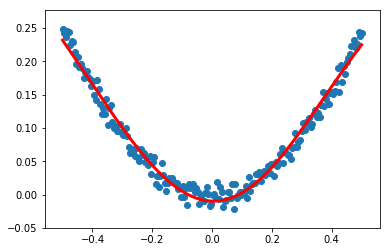

In [4]:
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]    # np.newaxis: 增加一维，如原来为200，增加为(200,1)
noise = np.random.normal(0.0, 0.01, x_data.shape)
y_data = np.square(x_data) + noise
plt.scatter(x_data, y_data)
plt.show()

# 用tensorflow进行非线性回归
## 先定义两个占位符
x = tf.placeholder(tf.float32,[None, 1])
y = tf.placeholder(tf.float32, [None, 1])
## 网络结构：1-30-1
### layer1：参数初始化的方法也会影响模型性能
# w1 = tf.Variable(tf.random_normal([1,30]))
# b1 = tf.Variable(tf.zeros([30]))
w1 = tf.Variable(tf.truncated_normal([1,30]))    # tf.truncated_normal():截断的正态分布，如果生成的数据标准差在2个sigma以外，则重新生成随机数
b1 = tf.Variable(tf.zeros([30])+0.1)
wx_plus_b_1 = tf.matmul(x,w1) + b1
l1 = tf.nn.tanh(wx_plus_b_1)
### layer2
# w2 = tf.Variable(tf.random_normal([30,1]))
# b2 = tf.Variable(tf.zeros([1]))
w2 = tf.Variable(tf.truncated_normal([30,1]))
b2 = tf.Variable(tf.zeros([1])+0.1)
wx_plus_b_2 = tf.matmul(l1,w2) + b2
prediction = tf.nn.tanh(wx_plus_b_2)
# 用的是二次损失代价函数，可以替换为熵损失函数效果更佳
loss = tf.losses.mean_squared_error(y, prediction)
# 梯度下降法的效率还是有点慢，可以进行优化
train = tf.train.GradientDescentOptimizer(0.3).minimize(loss)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(3000):
        sess.run(train, feed_dict={x:x_data, y:y_data})
    predicton_value = sess.run(prediction, feed_dict={x:x_data})
    plt.scatter(x_data, y_data)
    plt.plot(x_data, predicton_value, 'r-', lw=3)
    plt.show()

本文亮点：  
①用np.random.rand()来生成0-1的随机数；np.random.normal()生成服从正态分布的随机数  
文中为：

    x_data = np.random.rand(100)    # np.random.rand(): 生成一个0-1间的均匀数组，100: 生成一百个
    noise = np.random.normal(loc=0.0, scale=0.01, size=x_data.shape)
②模型中准确率每次提升的大小与**学习率、参数初始化**有关  

    # 参数初始化的方式有：
    w1 = tf.Variable(tf.random_normal([1,30]))
    w1 = tf.Variable(tf.truncated_normal([1,30]))
    ## tf.truncated_normal()截断正态分布的效果更好
    b1 = tf.Variable(tf.zeros([30]))
    b1 = tf.Variable(tf.zeros([30])+0.1)
③要查看每一个参数，都需要调用sess.run()

    # 如文中为：
    print('Iter {}, weight is {}, bias is{}'.format(i, sess.run(w), sess.run(b)))